# Intelligent Systems Seminar Assignment 1

### Libraries

In [8]:
import statistics
import math
import random
from matplotlib import pyplot as plt
import numpy as np

## Population generation

Agent is an arithmetic expression constructed of numbers and symbols specified below.

Each number can be used `max_number_use` times, therefore the expression can contain from `1` to `len(numbers)*max_number_use` numbers.

After each number there is a symbol from `symbols`. But the symbol after the last number is ignored, but may used be in future generations like an unexpressed gene in human genome. That decision was made primarly to make crossover (permutation like) easier to implement.

In [2]:
numbers = ['10', '25', '100', '5', '3']
symbols = ['+', '-', '*', '/']

max_number_use = 1
min_numbers_in_expresion = 1

target_value = 2512

In [5]:
def generate_agent():
    n_numbers = random.randint(min_numbers_in_expresion, len(numbers)*max_number_use)
    selected_numbers = random.sample(numbers*max_number_use, n_numbers)
    return [(number, random.choice(symbols)) for number in selected_numbers]

def agent_to_expression(agent):
        expression = "".join(n + s for n, s in agent)
        return expression[:-1] # remove last operator
    
def evaluate_agent(agent):
    expression = agent_to_expression(agent)
    if len(expression) == 0: return 0
    else: return eval(expression)

def agent_to_string(agent):
    return f"{agent_to_expression(agent)} = {evaluate_agent(agent):.2f}"


Agent is constructed of tuples of a number and a symbol as seen below:

In [87]:
a = generate_agent()
print(a)

[('10', '/'), ('5', '-'), ('25', '*'), ('3', '*'), ('100', '/')]


`agent_to_expression` function joins the tuples together into a string, ignoring the last symbol

In [89]:
print(agent_to_expression(a))

10/5-25*3*100


`evaluate_agent` generates the expression and evaluates it

In [90]:
print(evaluate_agent(a))

-7498.0


`agent_to_string` creates a string with expression and its value

In [91]:
print(agent_to_string(a))

10/5-25*3*100 = -7498.00


Here are some randomly generated agents:

In [13]:
for i in range(20):
    a = generate_agent()
    print(agent_to_string(a))

10 = 10.00
100/3-25-10/5 = 6.33
5/25/100 = 0.00
100+25-5*10/3 = 108.33
3/10 = 0.30
100/5/10-3 = -1.00
25 = 25.00
5/10*3+100 = 101.50
25 = 25.00
10 = 10.00
100*5-3/10/25 = 499.99
5 = 5.00
3 = 3.00
100 = 100.00
3+25/5*100 = 503.00
3*10/25 = 1.20
5+3+100 = 108.00
25*10-5 = 245.00
3+10 = 13.00
3 = 3.00


## Fitness

Fitness is used as a scoring function for the genetic algorithm to determine the best agents to reproduce.

We defined some different fitness functions. They will be compared in section _Evaluation_.

In [161]:
def error(agent):
    return abs(evaluate_agent(agent) - target_value)

In [153]:
def fitness_abs(agent):
    return -error(agent)

In [156]:
def fitness_inverse(agent):
    return 1/(error(agent) + 0.0001) # + 0.0001 to avoid zero devision

In [155]:
def fitness_squared(agent):
    return -(error(agent)**2)

In [150]:
def fitness_log(agent):
    return -math.log2(error(agent)+1)

## Mutation


We defined 7 different types of mutation. Implementation and example mutations can be seen below:

In [106]:
agent = generate_agent()
print(agent)

[('3', '+'), ('10', '-'), ('100', '/')]


In [16]:
def mutation_change_symbol(agent):
    a = agent.copy()
    i = random.randrange(len(a))
    number, _ = a[i]
    a[i] = (number, random.choice(symbols))
    
    return a

In [107]:
print(agent)
print(mutation_change_symbol(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('3', '+'), ('10', '+'), ('100', '/')]


In [18]:
def mutation_change_number(agent):
    a = agent.copy()
    agent_numbers = [number for number, _ in a]
    # choose numbers that can be added without violating `max_number_use`
    candidate_numbers = list(filter(lambda n: agent_numbers.count(n) < max_number_use, numbers))
    if len(candidate_numbers) == 0: return a
    i = random.randrange(len(a))
    _, symbol = a[i]
    a[i] = (random.choice(candidate_numbers), symbol)
    
    return a

In [108]:
print(agent)
print(mutation_change_number(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('5', '+'), ('10', '-'), ('100', '/')]


In [27]:
def mutation_add_element(agent):
    a = agent.copy()
    agent_numbers = [number for number, _ in a]
    # choose numbers that can be added without violating `max_number_use`
    candidate_numbers = list(filter(lambda n: agent_numbers.count(n) < max_number_use, numbers))
    if len(candidate_numbers) == 0: return a
    a.insert(random.randint(0, len(a)), (random.choice(candidate_numbers), random.choice(symbols)))
    
    return a

In [109]:
print(agent)
print(mutation_add_element(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('5', '-'), ('3', '+'), ('10', '-'), ('100', '/')]


In [110]:
def mutation_remove_element(agent):
    a = agent.copy()
    if len(a) <= 1: return a # nothing to remove
    del a[random.randrange(len(a))]
    
    return a

In [111]:
print(agent)
print(mutation_remove_element(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('10', '-'), ('100', '/')]


In [92]:
def mutation_swap_number(agent):
    a = agent.copy()
    i = random.randrange(len(agent))
    j = random.randrange(len(agent))
    
    a[i], a[j] = (a[j][0], a[i][1]), (a[i][0], a[j][1])
    
    return a

In [112]:
print(agent)
print(mutation_swap_number(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('10', '+'), ('3', '-'), ('100', '/')]


In [94]:
def mutation_swap_symbol(agent):
    a = agent.copy()
    i = random.randrange(len(agent))
    j = random.randrange(len(agent))
    
    a[i], a[j] = (a[i][0], a[j][1]), (a[j][0], a[i][1])
    
    return a

In [114]:
print(agent)
print(mutation_swap_symbol(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('3', '+'), ('10', '-'), ('100', '/')]


In [116]:
def mutation_swap_element(agent):
    a = agent.copy()
    i = random.randrange(len(agent))
    j = random.randrange(len(agent))
    
    a[i], a[j] = a[j], a[i]
    
    return a

In [117]:
print(agent)
print(mutation_swap_element(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('100', '/'), ('10', '-'), ('3', '+')]


In [118]:
def mutation(agent):
    mutation_functions = [mutation_change_symbol, mutation_change_number, mutation_add_element, mutation_remove_element, 
                          mutation_swap_number, mutation_swap_symbol, mutation_swap_element]
    return random.choice(mutation_functions)(agent)

In [119]:
print(agent)
print(mutation(agent))

[('3', '+'), ('10', '-'), ('100', '/')]
[('3', '+'), ('100', '-'), ('10', '/')]


## Crossover

Crossover takes 2 parents: `parent1` and `parent2`:

In [120]:
parent1 = generate_agent()
parent2 = generate_agent()
print(parent1, agent_to_string(parent1))
print(parent2, agent_to_string(parent2))

[('25', '*'), ('5', '-'), ('100', '-')] 25*5-100 = 25.00
[('100', '+'), ('3', '-'), ('25', '/')] 100+3-25 = 78.00


It then selects a section that overlaps both parents and initializes `child1` to a section of `parent1` and `child2` to a section of `parent2`.

In [121]:
min_len = min(len(parent1), len(parent2))
selection_start = random.randrange(0, min_len)
selection_end = random.randrange(selection_start, min_len)

child1 = parent1[selection_start:selection_end]
child2 = parent2[selection_start:selection_end]

print(child1, agent_to_string(child1))
print(child2, agent_to_string(child2))

[('5', '-')] 5 = 5.00
[('3', '-')] 3 = 3.00


The rest of the elements come from the other parent by removing the numbers that already come from the first parent.

In [123]:
def agent_subtract(agent1, agent2):
    agent2_numbers = [n for n, _ in agent2]
    res = []
    for number, symbol in agent1:
        if number in agent2_numbers: agent2_numbers.remove(number)
        else: res.append((number, symbol))
    return res

In [122]:
parent1_remainder = agent_subtract(parent1, child2)
parent2_remainder = agent_subtract(parent2, child1)

print(parent1_remainder, agent_to_string(parent1_remainder))
print(parent2_remainder, agent_to_string(parent2_remainder))

[('25', '*'), ('5', '-'), ('100', '-')] 25*5-100 = 25.00
[('100', '+'), ('3', '-'), ('25', '/')] 100+3-25 = 78.00


In [124]:
child1.extend(parent2_remainder)
child2.extend(parent1_remainder)

print(child1, agent_to_string(child1))
print(child2, agent_to_string(child2))

[('5', '-'), ('100', '+'), ('3', '-'), ('25', '/')] 5-100+3-25 = -117.00
[('3', '-'), ('25', '*'), ('5', '-'), ('100', '-')] 3-25*5-100 = -222.00


Everything from above packed into a function:

In [45]:
def crossover(parent1, parent2):
    min_len = min(len(parent1), len(parent2))
    selection_start = random.randrange(0, min_len)
    selection_end = random.randrange(selection_start, min_len)

    child1 = parent1[selection_start:selection_end]
    child2 = parent2[selection_start:selection_end]
    child1.extend(agent_subtract(parent2, child1))
    child2.extend(agent_subtract(parent1, child2))
    
    return (child1, child2)

In [53]:
child1, child2 = crossover(parent1, parent2)
print(f"Parent 1: {agent_to_string(parent1)}; lenght: {len(parent1)}")
print(f"Parent 2: {agent_to_string(parent2)}; length: {len(parent2)}")
print(f"Child 1: {agent_to_string(child1)}; length: {len(child1)}")
print(f"Child 2: {agent_to_string(child2)}; length: {len(child2)}")

Parent 1: 25-100/10+5 = 20.00; lenght: 4
Parent 2: 10/5/3 = 0.67; length: 3
Child 1: 100/10/5/3 = 0.67; length: 4
Child 2: 5/25-100/10 = -9.80; length: 4


## Selection

### Top agents
The first naive approach is to order the agents by their fitness and select the top $n$ agents.

In [57]:
def select_best_agents(population_with_fitness, n_agents):
    return list(sorted(population_with_fitness, key=lambda e: e[1], reverse=True))[:n_agents]

Lets create a 100 agents and select the best 10.

In [259]:
population = [generate_agent() for _ in range(100)]
population_with_fitness = [(a, fitness_log(a)) for a in population]
population_fitness = [f for a, f in population_with_fitness]

best_agents = select_best_agents(population_with_fitness, 10)

for a, f in best_agents:
    print(f"error: {error(a):.3f}, fitness: {f:.3f}, agent: {agent_to_string(a)}, ")

error: 10.000, fitness: -3.459, agent: 100*25-3+5 = 2502.00, 
error: 12.000, fitness: -3.700, agent: 25*100 = 2500.00, 
error: 1012.000, fitness: -9.984, agent: 3*5*100 = 1500.00, 
error: 1265.000, fitness: -10.306, agent: 25/10*100*5-3 = 1247.00, 
error: 1512.000, fitness: -10.563, agent: 10*100 = 1000.00, 
error: 1957.000, fitness: -10.935, agent: 5+10*25+3*100 = 555.00, 
error: 1974.000, fitness: -10.948, agent: 100*5+10+3+25 = 538.00, 
error: 2012.000, fitness: -10.975, agent: 100*5 = 500.00, 
error: 2015.000, fitness: -10.977, agent: 100*25/5-3 = 497.00, 
error: 2095.333, fitness: -11.034, agent: 25*5*10/3 = 416.67, 


### Weighted choice
Another approach is to compute wheits based on the fitness value and than make a random weighted choice of $n$ agents.

In [254]:
def get_weights(population_with_fitness, verbose=False):
    k = 1.0 # if k is close to 1 best agents are more favored if k > 1 the difference in weights between different agents gets smaller
    population_fitness = [f for a, f in population_with_fitness]
    min_fitness = min(population_fitness)
    base_fitness = -min_fitness*k
    population_with_weights = [(a, f, (f+base_fitness)/base_fitness) for a, f in population_with_fitness]
    population_with_weights_ordered = sorted(population_with_weights, key=lambda e: e[2])

    if verbose:
        for a, f, w in population_with_weights[:10]:
            print(f"fitness: {f:.3f}, weight: {w:.3f}, agent: {agent_to_string(a)}")
            
        weights_ordered = [w for a, f, w in population_with_weights_ordered]
        plt.figure(figsize=(10, 5))
        plt.subplot(1,2,1)
        plt.title("Oredered agents (x) and their weights (y)")
        plt.plot(weights_ordered)
        plt.subplot(1,2,2)
        plt.title("Distribution of weights")
        _ = plt.hist(weights_ordered, bins=40)
    
    return [w for a, f, w in population_with_weights]

Lets look at the distribution of the weights with logarithmic fitness function:

fitness: -11.294, weight: 0.390, agent: 100*5/10/25 = 2.00
fitness: -11.266, weight: 0.391, agent: 25+10*3-5 = 50.00
fitness: -11.289, weight: 0.390, agent: 5+100/10*3-25 = 10.00
fitness: -11.141, weight: 0.398, agent: 5+25*10 = 255.00
fitness: -11.315, weight: 0.389, agent: 5/100-10-25 = -34.95
fitness: -11.304, weight: 0.389, agent: 10-25+5/100 = -14.95
fitness: -11.629, weight: 0.372, agent: 100-5-25*10*3 = -655.00
fitness: -11.292, weight: 0.390, agent: 5 = 5.00
fitness: -11.292, weight: 0.390, agent: 5 = 5.00
fitness: -11.485, weight: 0.379, agent: 5-10/3*100-25 = -353.33


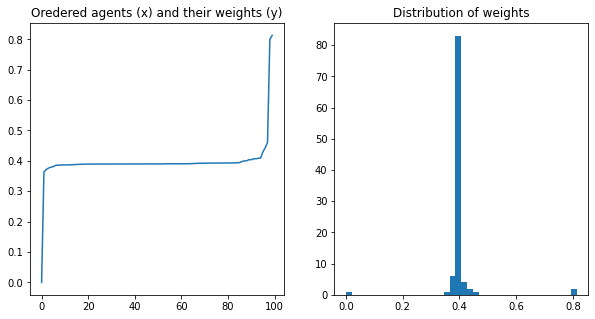

In [267]:
population_with_fitness = [(a, fitness_log(a)) for a in population]
_ = get_weights(population_with_fitness, verbose=True)

We can see that the best few agents get very large weight and the most agents get weights around 0.2 to 0.5 (depends on the population). There are some very bad agents that gat almost 0 weight.

If we use different fitness function (negative absolute error for example), we get differnet distrubution.

fitness: -2487.000, weight: 0.834, agent: 25 = 25.00
fitness: -2508.900, weight: 0.833, agent: 3+10/100 = 3.10
fitness: -9.000, weight: 0.999, agent: 25*100+3 = 2503.00
fitness: -762.000, weight: 0.949, agent: 100*3*5+25*10 = 1750.00
fitness: -2502.000, weight: 0.833, agent: 10 = 10.00
fitness: -2509.000, weight: 0.833, agent: 3 = 3.00
fitness: -2387.000, weight: 0.841, agent: 25*5 = 125.00
fitness: -2402.000, weight: 0.840, agent: 100+10 = 110.00
fitness: -2335.333, weight: 0.844, agent: 25*100/3/5+10 = 176.67
fitness: -2506.700, weight: 0.833, agent: 3/10+5 = 5.30


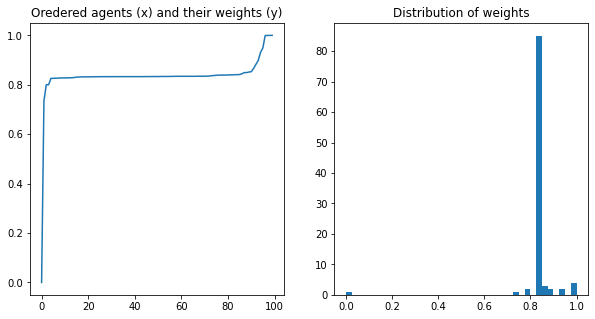

In [250]:
population_with_fitness = [(a, fitness_abs(a)) for a in population]
_ = get_weights(population_with_fitness, verbose=True)

Now we can implement a function that makes a weighted random choice based on before computed wheights:

In [252]:
def select_weighted(population_with_fitness, n_agents):
    weights = get_weights(population_with_fitness)
    return random.choices(population_with_fitness, weights=weights, k=n_agents)

In [268]:
best_agents_weighted = select_weighted(population_with_fitness, 10)

for a, f in best_agents_weighted:
    print(f"error: {error(a):.3f}, fitness: {f:.3f}, agent: {agent_to_string(a)}, ")

error: 2502.000, fitness: -11.289, agent: 10 = 10.00, 
error: 2432.000, fitness: -11.249, agent: 100+5-25 = 80.00, 
error: 2407.000, fitness: -11.234, agent: 100+5 = 105.00, 
error: 10.000, fitness: -3.459, agent: 100*25-3+5 = 2502.00, 
error: 2502.000, fitness: -11.289, agent: 10 = 10.00, 
error: 2405.000, fitness: -11.232, agent: 25-5-10+100-3 = 107.00, 
error: 2502.000, fitness: -11.289, agent: 10 = 10.00, 
error: 2387.000, fitness: -11.222, agent: 25*5 = 125.00, 
error: 2600.333, fitness: -11.345, agent: 5/3+10-100 = -88.33, 
error: 2445.333, fitness: -11.256, agent: 5/3-10+100-25 = 66.67, 


## Evolution


In [54]:
def evolve(
    population, fitness_function, selection_function, crossover_function, mutation_function, 
    mutation_probability=0.4, survival_probability=0.1, max_iterations=100, fitness_threshold=0, keep_best = False,
    verbose=False, plot=False
):
    population_size = len(population)
    
    min_fitness_log = []
    max_fitness_log = []
    mean_fitness_log = []
    
    iterations = 0
    
    for generation in range(max_iterations):
        iterations += 1
        # evaluate population
        population_with_fitness = [(a, fitness_function(a)) for a in population]
        population_fitness = [f for a, f in population_with_fitness]
        
        # compute metrics
        mean_fitness = statistics.mean(population_fitness)
        max_fitness = max(population_fitness)
        min_fitness = min(population_fitness)
        
        # log metrics
        mean_fitness_log.append(mean_fitness)
        max_fitness_log.append(max_fitness)
        min_fitness_log.append(min_fitness)
        
        # make selection
        best_agents_with_fitness = selection_function(population_with_fitness, math.ceil(population_size*survival_probability))
        best_agents = [a for a, _ in best_agents_with_fitness]
        
        # print metrics
        if verbose:
            print(f"Generation {generation}: fitness min: {min_fitness:.2f}, max: {max_fitness:.2f}, mean: {mean_fitness:.2f}; best agent: {agent_to_string(best_agents[0])}")
            
        if max_fitness >= fitness_threshold: break
        
            
        if keep_best:
            population = best_agents.copy()
        else:
            population = []

        # crossover
        for i in range(len(population), population_size, 2):
            parent1, parent2 = random.sample(best_agents, 2)
            child1, child2 = crossover_function(parent1, parent2)
            population.append(child1)
            population.append(child2)
            
        # mutation
        for i, agent in enumerate(population):
            if random.random() < mutation_probability:
                population[i] = mutation_function(agent)
                
            
    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(max_fitness_log, label="max")
        plt.plot(mean_fitness_log, label="mean")
        #plt.plot(min_fitness_log, label="min")
        plt.legend()
        
    return (iterations, (max_fitness_log, mean_fitness_log, min_fitness_log))

## Evaluation

In [56]:
population_size = 100
max_iterations = 300

Generation 0: fitness min: 0.00, max: 0.08, mean: 0.00; best agent: 25*100 = 2500.00
Generation 1: fitness min: 0.00, max: 0.17, mean: 0.01; best agent: 5+3+25*100+10 = 2518.00
Generation 2: fitness min: 0.00, max: 0.17, mean: 0.02; best agent: 5+3+25*100+10 = 2518.00
Generation 3: fitness min: 0.00, max: 0.17, mean: 0.06; best agent: 5+3+25*100+10 = 2518.00
Generation 4: fitness min: 0.00, max: 0.17, mean: 0.10; best agent: 5+3+25*100+10 = 2518.00
Generation 5: fitness min: 0.00, max: 0.33, mean: 0.12; best agent: 5+10+25*100 = 2515.00
Generation 6: fitness min: 0.00, max: 1.00, mean: 0.15; best agent: 3+25*100+10 = 2513.00
Generation 7: fitness min: 0.00, max: 1.00, mean: 0.24; best agent: 3+25*100+10 = 2513.00
Generation 8: fitness min: 0.00, max: 1.00, mean: 0.40; best agent: 3+10+25*100 = 2513.00
Generation 9: fitness min: 0.00, max: 3.00, mean: 0.72; best agent: 25*100+5/3+10 = 2511.67
Generation 10: fitness min: 0.00, max: 10000.00, mean: 100.68; best agent: 25*100+5-3+10 = 2512

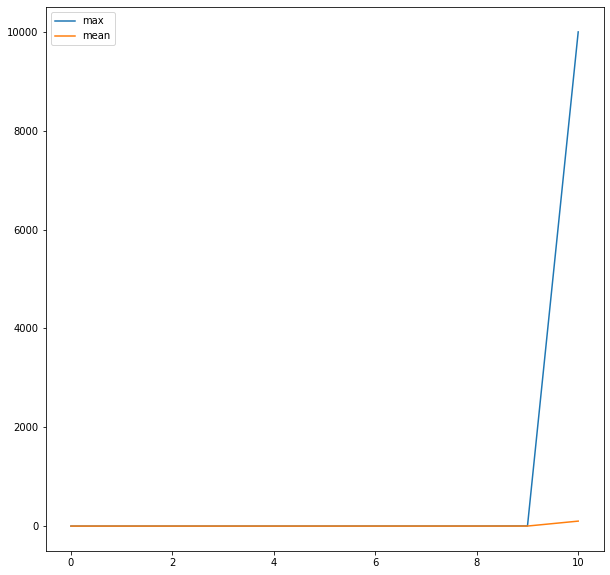

In [65]:
population = [generate_agent() for _ in range(population_size)]
_ = evolve(
    population,
    fitness_inverse,
    select_best_agents,
    crossover,
    mutation,
    fitness_threshold=10000.00,
    mutation_probability=0.2, survival_probability=0.2, max_iterations=300,
    verbose=True, keep_best=False, plot=True
)

### Comparison with random search

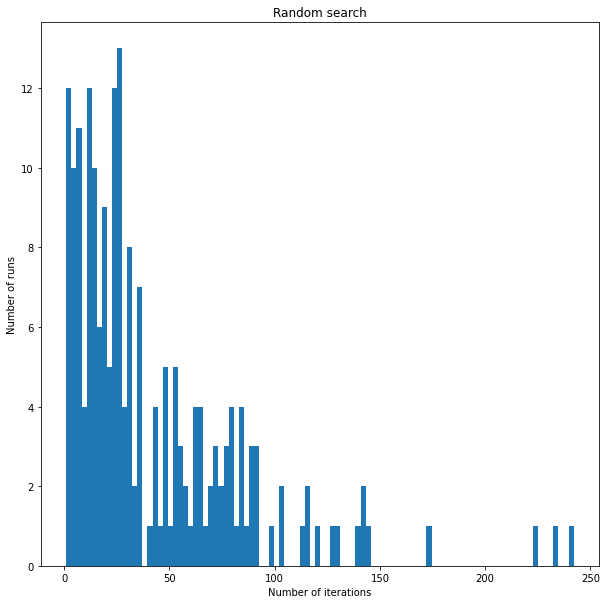

In [66]:
N = 200
iterations_log = []
for i in range(N):
    iterations = 0
    for i in range(max_iterations):
        iterations += 1
        population = [generate_agent() for _ in range(population_size)]
        population_with_fitness = [(a, fitness_abs(a)) for a in population]
        population_fitness = [f for a, f in population_with_fitness]
        if max(population_fitness) == 0: break

    iterations_log.append(iterations)

plt.figure(figsize=(10,10))
plt.title("Random search")
plt.xlabel('Number of iterations')
plt.ylabel('Number of runs')
_ = plt.hist(iterations_log, bins=100)

### Different fitness functions

Lets see how does the choice of a fitness function effect performance. We run genetic alghorithm with each fitness function a 200 times and plot a histogram of iterations it took to find the optimal agent. 

abs - mean: 31.39, min: 1, max: 300, stdev: 76.96718546361791
inverse - mean: 22.895, min: 1, max: 300, stdev: 60.67148523485325
sqared - mean: 25.8, min: 1, max: 300, stdev: 66.69151965557427


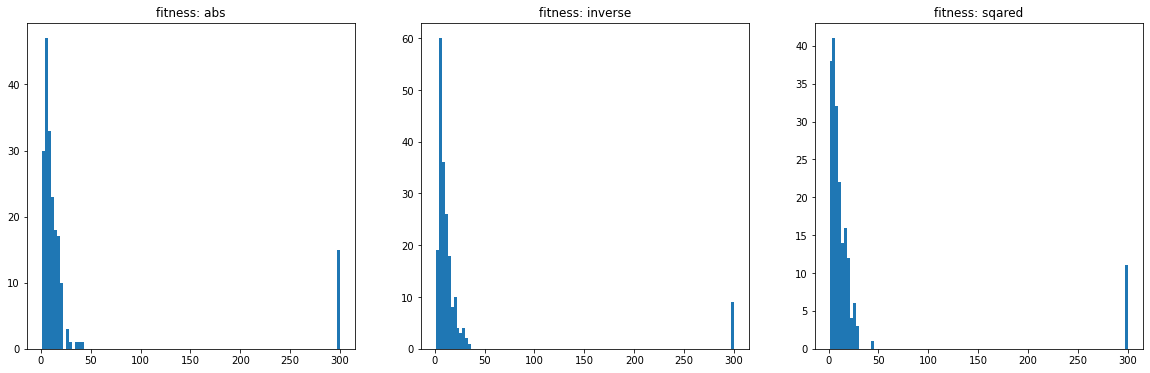

In [91]:
N = 200
fitness_functions = [(fitness_abs, 0, "abs"), (fitness_inverse, 10000, "inverse"), (fitness_squared, 0, "squared")]

plt.figure(figsize=(20,6))

for j, (fitness_function, fitness_threshold, label) in enumerate(fitness_functions):
    iterations_log = []

    for i in range(N):
        population = [generate_agent() for _ in range(population_size)]
        iterations, _ = evolve(
            population,
            fitness_function,
            select_best_agents,
            crossover,
            mutation,
            mutation_probability=0.2, survival_probability=0.2, max_iterations=300, keep_best=False, fitness_threshold=fitness_threshold
        )

        iterations_log.append(iterations)
        
    print(f"{label} - mean: {statistics.mean(iterations_log)}, min: {min(iterations_log)}, max: {max(iterations_log)}, stdev: {statistics.stdev(iterations_log)}")
    
    plt.subplot(1, 3, j+1)
    plt.title(f"fitness: {label}")
    _ = plt.hist(iterations_log, bins=100)
        

## Bonus task: minimize expression length

In [106]:
max_number_use = 5
min_numbers_in_expresion = 1

For this task we have to define a new fitness function that also takes into account the expression length.

In [83]:
def fitness_length(agent):
    return fitness_inverse(agent) + 3/(len(agent)+5)

Generation 0: fitness min: 0.30, max: 0.50, mean: 0.40; best agent: 100 = 100.00
Generation 1: fitness min: 0.43, max: 0.51, mean: 0.49; best agent: 25*100 = 2500.00
Generation 2: fitness min: 0.38, max: 0.51, mean: 0.49; best agent: 100*25 = 2500.00
Generation 3: fitness min: 0.38, max: 0.51, mean: 0.49; best agent: 100*25 = 2500.00
Generation 4: fitness min: 0.38, max: 0.52, mean: 0.49; best agent: 25*100+5 = 2505.00
Generation 5: fitness min: 0.38, max: 0.52, mean: 0.48; best agent: 25*100+5 = 2505.00
Generation 6: fitness min: 0.33, max: 0.87, mean: 0.49; best agent: 25*100+10 = 2510.00
Generation 7: fitness min: 0.32, max: 0.87, mean: 0.49; best agent: 25*100+10 = 2510.00
Generation 8: fitness min: 0.30, max: 1.33, mean: 0.55; best agent: 3+100*25+10 = 2513.00
Generation 9: fitness min: 0.30, max: 1.33, mean: 0.61; best agent: 3+25*100+10 = 2513.00
Generation 10: fitness min: 0.30, max: 1.33, mean: 0.71; best agent: 3+100*25+10 = 2513.00
Generation 11: fitness min: 0.30, max: 1.33

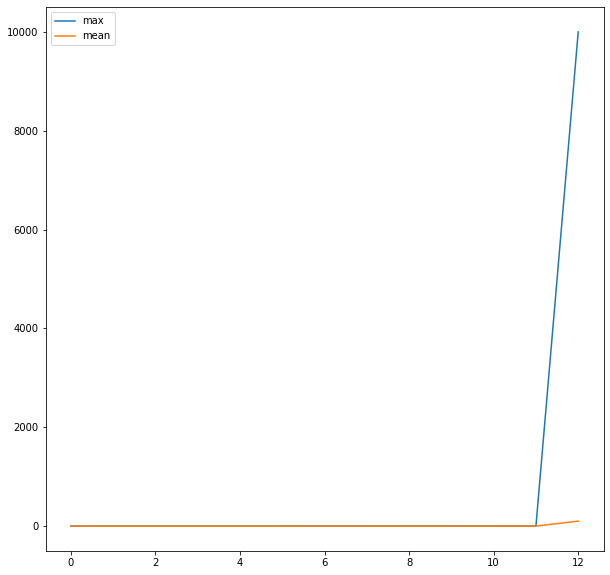

In [85]:
population = [generate_agent() for _ in range(population_size)]
_ = evolve(
    population,
    fitness_length,
    select_best_agents,
    crossover,
    mutation,
    fitness_threshold=10000.00,
    mutation_probability=0.5, survival_probability=0.2, max_iterations=300,
    verbose=True, keep_best=True, plot=True
)

In [155]:
def fitness_length_2(agent):
    return fitness_abs(agent) - len(agent)*2

Generation 0: fitness min: -672514.00, max: -23.47, mean: -15221.39; best agent: 25-10/3-5/25+100*25 = 2521.47
Generation 1: fitness min: -22622.12, max: -23.47, mean: -2177.94; best agent: 25-10/3-5/25+100*25 = 2521.47
Generation 2: fitness min: -9372512.00, max: -18.00, mean: -148314.84; best agent: 3-5+25*10/25+100*25 = 2508.00
Generation 3: fitness min: -92928.67, max: -18.00, mean: -2205.47; best agent: 3-5+25*10/25+100*25 = 2508.00
Generation 4: fitness min: -60029.01, max: -16.40, mean: -1618.49; best agent: 25-5*3-10/25+100*25 = 2509.60
Generation 5: fitness min: -64999.40, max: -16.40, mean: -1496.29; best agent: 25-10/25-5-3-5+100*25 = 2511.60
Generation 6: fitness min: -247517.40, max: -14.20, mean: -3728.37; best agent: 25-3-10+5/25+100*25 = 2512.20
Generation 7: fitness min: -22530.88, max: -14.40, mean: -1651.65; best agent: 5+10-10/25-3+100*25 = 2511.60
Generation 8: fitness min: -5059.60, max: -12.33, mean: -663.76; best agent: 5+10-10/3+100*25 = 2511.67
Generation 9: f

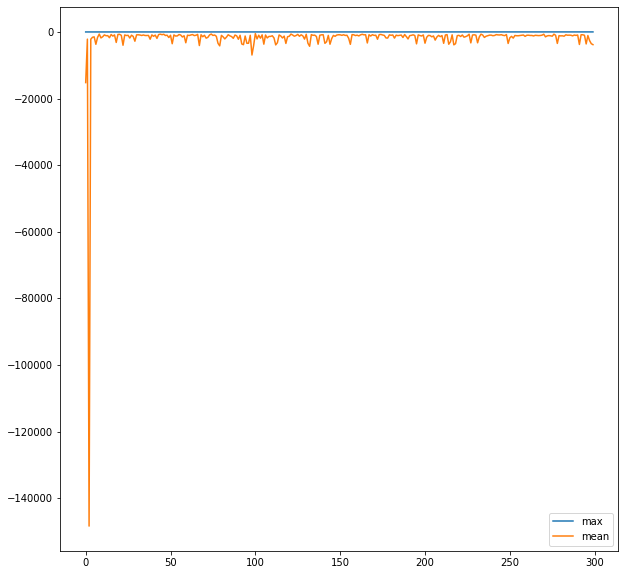

In [162]:
population = [generate_agent() for _ in range(population_size)]
_ = evolve(
    population,
    fitness_length_2,
    select_best_agents,
    crossover,
    mutation,
    fitness_threshold=-8,
    mutation_probability=0.4, survival_probability=0.2, max_iterations=300,
    verbose=True, keep_best=False, plot=True
)